# Visualize pathway ranking

This notebook will visualize pathway ranking obtained by the different enrichment analysis methods.

**Note**: This notebook is expecting outputs for all enrichment methods generated by the [previous notebook](2_apply_enrichment_method.ipynb)

**Implementation note:**
The project id = GSE11352 for the human cancer analysis did not find any DEGs in the simulated experiments, so we are manually removing the ORA enrichment method for this array analysis. But this method can be added back by removing the conditional statements.

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

import os
import pandas as pd
import numpy as np
import plotnine as pn
from IPython.display import Image, display, SVG
import svgutils.transform as sg
from lxml import etree
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ponyo import utils

np.random.seed(123)

In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_cancer.tsv")
)

params = utils.read_config(config_filename)

# Select platform technology

# platform = ["array", "rnaseq"]
platform = "array"

In [3]:
# Load params
dataset_name = params["dataset_name"]
project_id = params["project_id"]

In [4]:
# Create dictionary of enrichment method: statistic
method_stats_dict = {
    "GSEA": "padj",
    "GSVA": "ES",
    "CAMERA": "FDR",
    "ORA": "p.adjust"
}

## Get pathway summary data

In [5]:
# Pathway summary files
gsea_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}.tsv"
)
gsva_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_GSVA.tsv"
)
camera_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_CAMERA.tsv"
)
ora_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_ORA.tsv"
)

In [6]:
# Pathway summary data
gsea_pathway_summary = pd.read_csv(gsea_pathway_summary_filename, sep="\t", index_col=0, header=0)
gsva_pathway_summary = pd.read_csv(gsva_pathway_summary_filename, sep="\t", index_col=0, header=0)
camera_pathway_summary = pd.read_csv(camera_pathway_summary_filename, sep="\t", index_col=0, header=0)

if platform == "rnaseq":
    ora_pathway_summary = pd.read_csv(ora_pathway_summary_filename, sep="\t", index_col=0, header=0)

## Format data for plotting

In [7]:
print(gsea_pathway_summary.shape)
gsea_pathway_summary.head()

(50, 11)


,Pathway ID,Adj P-value (Real),Rank (Real),padj (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Mean padj (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,0.002926,49.0,0.002926,0.114107,28.0,56.250000,0.209626,0.212949,25,-0.970655
HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_ESTROGEN_RESPONSE_EARLY,0.002926,49.0,0.002926,0.108991,29.0,58.333333,0.203446,0.236969,25,-0.846187
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,0.002926,49.0,0.002926,0.001426,49.0,100.000000,0.008430,0.024148,25,-0.227945
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,0.004468,47.0,0.004468,0.001426,49.0,100.000000,0.052352,0.173915,25,-0.275329
HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,0.004653,46.0,0.004653,0.001942,46.0,93.750000,0.044320,0.150256,25,-0.263995


In [8]:
print(gsva_pathway_summary.shape)
gsva_pathway_summary.head()

(50, 11)


,Pathway ID,Rank (Real),abs(ES) (Real),ES (Real),Median ES (simulated),Rank (simulated),Percentile (simulated),Mean abs(ES) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,50.0,0.412762,0.412762,0.490072,50.0,100.000000,0.428023,0.182432,25,-0.083652
HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_ESTROGEN_RESPONSE_EARLY,49.0,0.360717,0.360717,0.089701,11.0,20.408163,0.111944,0.077893,25,3.193791
HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,48.0,0.327302,0.327302,0.086470,10.0,18.367347,0.095211,0.067228,25,3.452270
HALLMARK_APICAL_SURFACE,HALLMARK_APICAL_SURFACE,47.0,0.324000,-0.324000,0.074098,8.0,14.285714,0.096101,0.078030,25,2.920659
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,46.0,0.317462,0.317462,0.290409,43.0,85.714286,0.262137,0.100235,25,0.551951


In [9]:
print(camera_pathway_summary.shape)
camera_pathway_summary.head()

(50, 11)


,Pathway ID,Adj P-value (Real),Rank (Real),FDR (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Mean FDR (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,8.307384e-08,50.0,8.307384e-08,0.000002,50.0,100.000000,0.034673,0.113409,25,-0.305731
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,3.459403e-06,48.5,3.459403e-06,0.000050,49.0,97.959184,0.049866,0.166484,25,-0.299501
HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANDROGEN_RESPONSE,3.459403e-06,48.5,3.459403e-06,0.000384,48.0,95.918367,0.051559,0.166302,25,-0.310012
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,4.095491e-05,47.0,4.095491e-05,0.000568,47.0,93.877551,0.069770,0.191864,25,-0.363432
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,4.157648e-05,46.0,4.157648e-05,0.001263,46.0,91.836735,0.088521,0.208446,25,-0.424472


In [10]:
if platform == "rnaseq":
    print(ora_pathway_summary.shape)
    ora_pathway_summary.head()

## Pathway ranking per enrichment method

In [11]:
# define plotting function
def plot_significance_vs_ranking(summary_df, method_name, stats_colname, x_label, output_figure_filename):
    # Format input dataframe
    plot_df = pd.DataFrame(
        data={"Test statistic": summary_df[f"Median {stats_colname} (simulated)"].values,
          "Percentile rank": summary_df["Percentile (simulated)"].values
         },
        index=summary_df.index
    )
    
    fig = pn.ggplot(plot_df, pn.aes(x='Test statistic', y='Percentile rank'))
    fig += pn.geom_point()
    fig += pn.geom_point(plot_df[plot_df['Percentile rank']>90.0],
                         pn.aes(x='Test statistic', y='Percentile rank'),
                         color='red'
                        )
    
    # Only used for array data
    # Manually stagger labels since they overlap here
    if method_name == "GSEA":
        labels = [x if plot_df.loc[x,'Percentile rank']>90.0 else "" for x in plot_df.index]
        labels_1 = [x if x=='HALLMARK_MYC_TARGETS_V1' else "" for x in labels]
        labels_2 = [x if x=='HALLMARK_E2F_TARGETS' else "" for x in labels]
        labels_3 = [x if x=='HALLMARK_G2M_CHECKPOINT' else "" for x in labels]
        labels_4 = [x if x=='HALLMARK_INTERFERON_GAMMA_RESPONSE' else "" for x in labels]
        labels_5 = [x if x=='HALLMARK_INFLAMMATORY_RESPONSE' else "" for x in labels]
        labels_6 = [x if x=='HALLMARK_TNFA_SIGNALING_VIA_NFKB' else "" for x in labels]
        
        fig += pn.geom_text(pn.aes(label= labels_1),
                            ha='left',
                            va='top',
                            size=5,
                            y=102
                           )
        fig += pn.geom_text(pn.aes(label= labels_2),
                            ha='left',
                            va='bottom',
                            size=5,
                            y=98
                           )
        fig += pn.geom_text(pn.aes(label= labels_3),
                            ha='left',
                            va='bottom',
                            size=5,
                            y=96
                           )
        fig += pn.geom_text(pn.aes(label= labels_4),
                            ha='left',
                            va='bottom',
                            size=5,
                            y=94
                           )
        fig += pn.geom_text(pn.aes(label= labels_5),
                            ha='left',
                            va='bottom',
                            size=5,
                            y=92
                           )
        fig += pn.geom_text(pn.aes(label= labels_6),
                            ha='left',
                            va='bottom',
                            size=5,
                            y=90
                           )
    else: 
        fig += pn.geom_text(pn.aes(label=
                                   [x if plot_df.loc[x,'Percentile rank']>90.0 else "" for x in plot_df.index]),
                            ha='left',
                            va='top',
                            size=5
                           )
        
    # If using RNA-seq
    """fig += pn.geom_text(pn.aes(label=
                                   [x if plot_df.loc[x,'Percentile rank']>90.0 else "" for x in plot_df.index]),
                            ha='left',
                            va='top',
                            size=5
                           )"""
    fig += pn.labs(x = x_label,
                y = 'Genericness (percentile of ranking)',
                title = f'{method_name} pathway statistics vs ranking')
    fig += pn.theme_bw()
    fig += pn.theme(
        legend_title_align = "center",
        plot_background=pn.element_rect(fill='white'),
        legend_key=pn.element_rect(fill='white', colour='white'), 
        legend_title=pn.element_text(family='sans-serif', size=15),
        legend_text=pn.element_text(family='sans-serif', size=12),
        plot_title=pn.element_text(family='sans-serif', size=15),
        axis_text=pn.element_text(family='sans-serif', size=12),
        axis_title=pn.element_text(family='sans-serif', size=15)
        )
    fig += pn.scales.xlim(0,1)
    
    # Save figure
    fig.save(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )
    print(fig)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSEA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


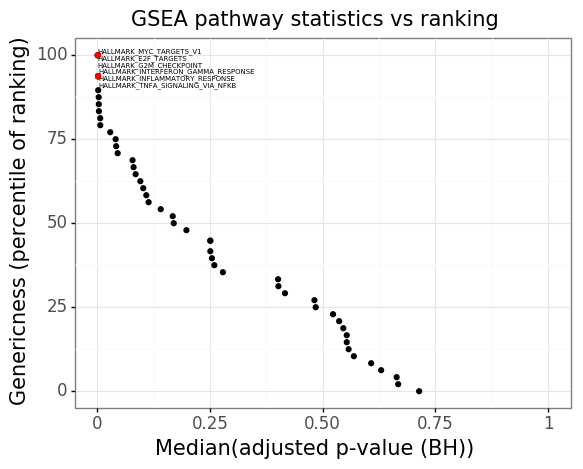

<ggplot: (8747428592893)>


In [12]:
plot_significance_vs_ranking(
    gsea_pathway_summary,
    "GSEA", 
    "adj p-value",
    "Median(adjusted p-value (BH))",
    "GSEA_pathway_ranking.svg"
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSVA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


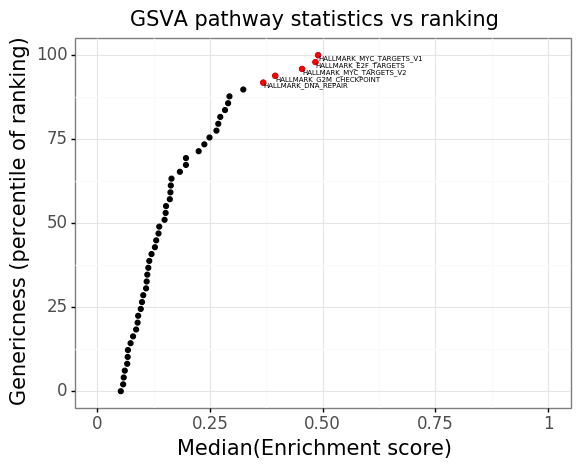

<ggplot: (8747419271813)>


In [13]:
plot_significance_vs_ranking(
    gsva_pathway_summary, 
    "GSVA",
    "ES", 
    "Median(Enrichment score)", 
    "GSVA_pathway_ranking.svg"
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: CAMERA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


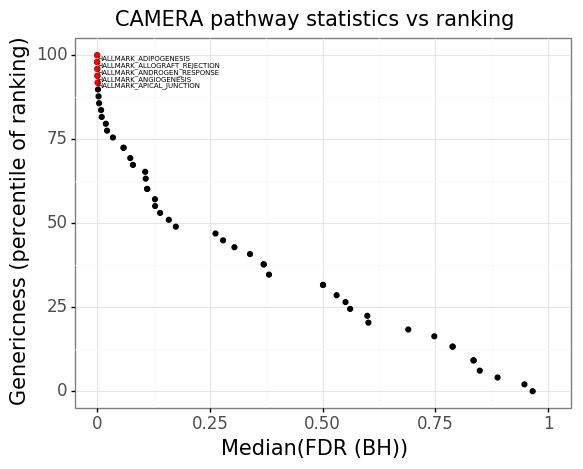

<ggplot: (8747428563925)>


In [14]:
plot_significance_vs_ranking(
    camera_pathway_summary,
    "CAMERA",
    "adj p-value",
    "Median(FDR (BH))", 
    "CAMERA_pathway_ranking.svg"
)

In [15]:
if platform == "rnaseq":
    plot_significance_vs_ranking(
        ora_pathway_summary, 
        "ORA",
        "adj p-value", 
        "Median(adjusted p-value (BH))",
        "ORA_pathway_ranking.svg"
    )

## Compare pathway ranking across enrichment methods

In [16]:
# define plotting function
def plot_paired_ranking(method1_summary_df, method2_summary_df, method1_name, method2_name, output_figure_filename):
    # Join dataframes to make sure the rows are aligned
    merged_summary_df = method1_summary_df.merge(
        method2_summary_df,
        left_index=True, 
        right_index=True,
        suffixes=[f"_{method1_name}", f"_{method2_name}"]
    )
        
    # Format input dataframe
    plot_df = pd.DataFrame(
        data={"Method1 ranking": merged_summary_df[f"Percentile (simulated)_{method1_name}"].values,
          "Method2 ranking": merged_summary_df[f"Percentile (simulated)_{method2_name}"].values
         },
        index=merged_summary_df.index
    )
    fig = pn.ggplot(plot_df, pn.aes(x='Method1 ranking', y='Method2 ranking'))
    fig += pn.geom_point()
    fig += pn.labs(x = f"{method1_name} pathway ranking",
                y = f"{method2_name} pathway ranking",
                title = f'{method1_name} vs {method2_name} pathway ranking')
    fig += pn.theme_bw()
    fig += pn.theme(
        legend_title_align = "center",
        plot_background=pn.element_rect(fill='white'),
        legend_key=pn.element_rect(fill='white', colour='white'), 
        legend_title=pn.element_text(family='sans-serif', size=15),
        legend_text=pn.element_text(family='sans-serif', size=12),
        plot_title=pn.element_text(family='sans-serif', size=15),
        axis_text=pn.element_text(family='sans-serif', size=12),
        axis_title=pn.element_text(family='sans-serif', size=15)
        )
    
    # Save figure
    fig.save(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )
    print(fig)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsea_gsva_compare_ranking.svg
  warn('Filename: {}'.format(filename))


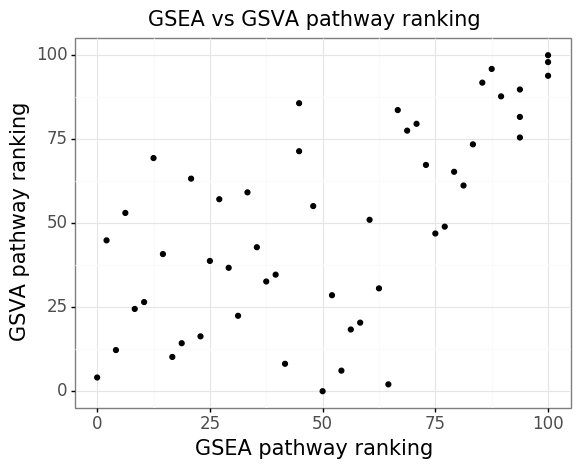

<ggplot: (8747419281929)>


In [17]:
plot_paired_ranking(
    gsea_pathway_summary,
    gsva_pathway_summary,
    "GSEA",
    "GSVA",
    "gsea_gsva_compare_ranking.svg"
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsea_camera_compare_ranking.svg
  warn('Filename: {}'.format(filename))


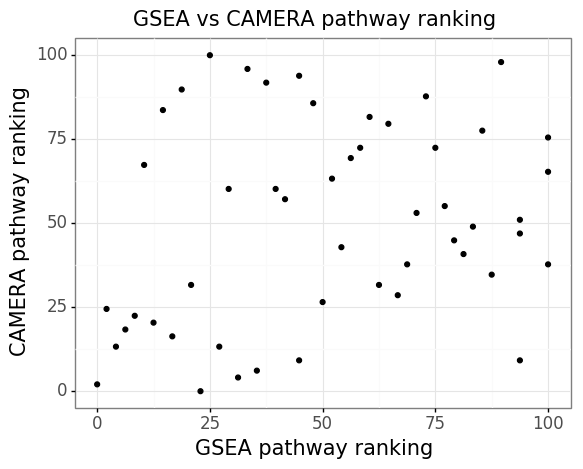

<ggplot: (8747419173625)>


In [18]:
plot_paired_ranking(
    gsea_pathway_summary,
    camera_pathway_summary,
    "GSEA",
    "CAMERA",
    "gsea_camera_compare_ranking.svg"
    )

In [19]:
if platform == "rnaseq":
    plot_paired_ranking(
        gsea_pathway_summary,
        ora_pathway_summary,
        "GSEA",
        "ORA",
        "gsea_ora_compare_ranking.svg"
        )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsva_camera_compare_ranking.svg
  warn('Filename: {}'.format(filename))


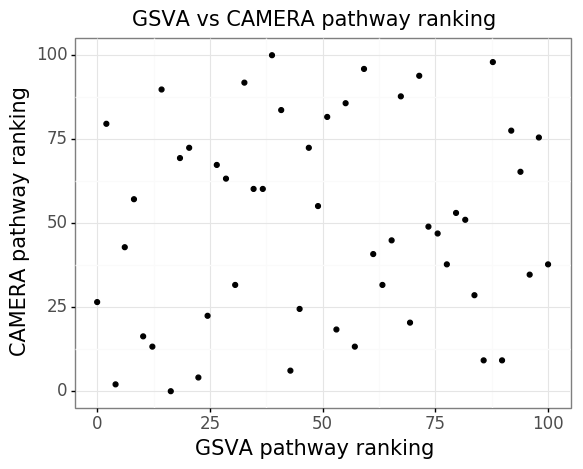

<ggplot: (8747419086529)>


In [20]:
plot_paired_ranking(
    gsva_pathway_summary,
    camera_pathway_summary,
    "GSVA",
    "CAMERA",
    "gsva_camera_compare_ranking.svg"
    )

In [21]:
if platform == "rnaseq":
    plot_paired_ranking(
        gsva_pathway_summary,
        ora_pathway_summary,
        "GSVA",
        "ORA",
        "gsva_ora_compare_ranking.svg"
        )

In [22]:
if platform == "rnaseq":
    plot_paired_ranking(
        camera_pathway_summary,
        ora_pathway_summary,
        "CAMERA",
        "ORA",
        "camera_ora_compare_ranking.svg"
        )

## Assemble plots into figure


In [23]:
def make_figure_panel(filename, scale_x_input, scale_y_input, x_loc, y_loc):
    panel = (
        sg.fromfile(filename)
    )
    
    panel_size = (
        np.round(float(panel.root.attrib['width'][:-2])*1.33, 0), 
        np.round(float(panel.root.attrib['height'][:-2])*1.33, 0)
    )

    scale_x = scale_x_input
    scale_y = scale_y_input

    print(f"original: {panel_size}")
    print(f"scaled:{(panel_size[0]*scale_x,panel_size[1]*scale_y)}")

    panel = panel.getroot()
    panel.scale_xy(x=scale_x, y=scale_y)
    panel.moveto(x_loc, y_loc)
    
    return panel

In [24]:
# Create diagonal panels
panel_11 = make_figure_panel(
    "GSEA_pathway_ranking.svg",
    scale_x_input=0.45, 
    scale_y_input=0.45,
    x_loc=10,
    y_loc=10
)
panel_22 = make_figure_panel(
    "GSVA_pathway_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=210,
    y_loc=200
)
panel_33 = make_figure_panel(
    "CAMERA_pathway_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=410,
    y_loc=400
)
if platform == "rnaseq":
    panel_44 = make_figure_panel(
        "ORA_pathway_ranking.svg",
        scale_x_input=0.45,
        scale_y_input=0.45,
        x_loc=610,
        y_loc=600
    )

original: (541.0, 428.0)
scaled:(243.45000000000002, 192.6)
original: (541.0, 428.0)
scaled:(243.45000000000002, 192.6)
original: (541.0, 428.0)
scaled:(243.45000000000002, 192.6)


In [25]:
# Create off-diagonal panels
panel_21 = make_figure_panel(
    "gsea_gsva_compare_ranking.svg",
    scale_x_input=0.45, 
    scale_y_input=0.45,
    x_loc=10,
    y_loc=200
)
panel_31 = make_figure_panel(
    "gsea_camera_compare_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=10,
    y_loc=400
)
if platform == "rnaseq":
    panel_41 = make_figure_panel(
        "gsea_ora_compare_ranking.svg",
        scale_x_input=0.45,
        scale_y_input=0.45,
        x_loc=10,
        y_loc=600
    )
panel_23 = make_figure_panel(
    "gsva_camera_compare_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=210,
    y_loc=400
)

if platform == "rnaseq":
    panel_24 = make_figure_panel(
        "gsva_ora_compare_ranking.svg",
        scale_x_input=0.45,
        scale_y_input=0.45,
        x_loc=210,
        y_loc=600
    )
    panel_34 = make_figure_panel(
        "camera_ora_compare_ranking.svg",
        scale_x_input=0.45,
        scale_y_input=0.45,
        x_loc=410,
        y_loc=600
    )

original: (541.0, 428.0)
scaled:(243.45000000000002, 192.6)
original: (541.0, 428.0)
scaled:(243.45000000000002, 192.6)
original: (541.0, 428.0)
scaled:(243.45000000000002, 192.6)


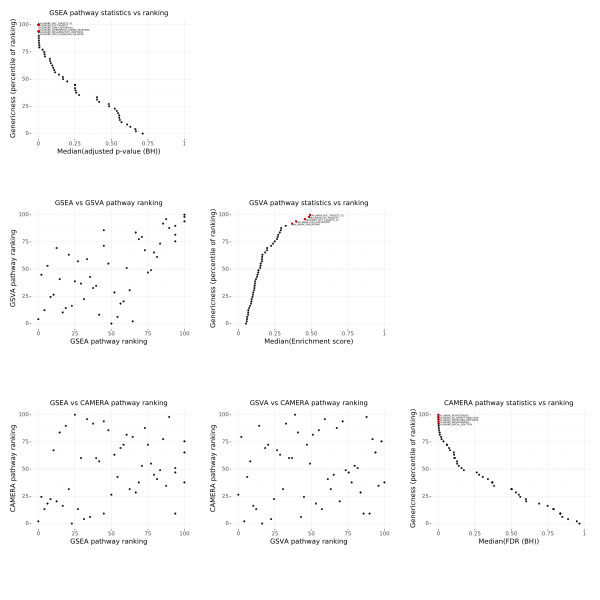

In [26]:
if platform == "rnaseq":
    figure_1 = sg.SVGFigure("800", "800")
    figure_1.append([
        etree.Element("rect", {"width":"100%", "height":"100%", "fill":"white"}),
        panel_11, 
        panel_22,
        panel_33,
        panel_44,
        panel_21,
        panel_31,
        panel_41,
        panel_23,
        panel_24,
        panel_34
    ])
    display(SVG(figure_1.to_str()))
else:
    figure_1 = sg.SVGFigure("600", "600")
    figure_1.append([
        etree.Element("rect", {"width":"100%", "height":"100%", "fill":"white"}),
        panel_11, 
        panel_22,
        panel_33,
        panel_21,
        panel_31,
        panel_23,
    ])
    display(SVG(figure_1.to_str()))

In [27]:
## save generated SVG files
figure_1.save(f"enrichment_paired_plot_{platform}.svg")

**Takeaway:**
* Here are the results demonstrating that different enrichment methods can easily be plugged into our simulation workflow to identify generic gene sets
* Depending on the enrichment method, pathway rankings vary due to the different assumptions and modeling procedures - there is not much concordance between different enrichment methods except GSEA and GSVA. More details about the methods can be found in the [previous notebook](2_apply_enrichment_method.ipynb)
* The generic pathways found in figure 4 [Powers et. al.](https://www.biorxiv.org/content/10.1101/259440v1.full.pdf), were consistent with the top ranked pathways found using GSVA (for both recount2 and Powers et. al. trained models) and GSEA (only for Powers et. al. trained model). 